**Q: What are the weights and bias of AND perceptron?**

In [1]:
import pandas as pd

weight1 = 1.0
weight2 = 1.0
bias = -2.0

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -2.0                    0          Yes
      0          1                  -1.0                    0          Yes
      1          0                  -1.0                    0          Yes
      1          1                   0.0                    1          Yes


**Q: What are the weights and bias of AND perceptron?**

In [2]:
import pandas as pd

weight1 = 1.0
weight2 = -3.0
bias = 1.0

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   1.0                    1          Yes
      0          1                  -2.0                    0          Yes
      1          0                   2.0                    1          Yes
      1          1                  -1.0                    0          Yes


**Perceptron Algorithm:**

In [5]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        result = prediction(X[i], W, b)
        if y[i] - result == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - result == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

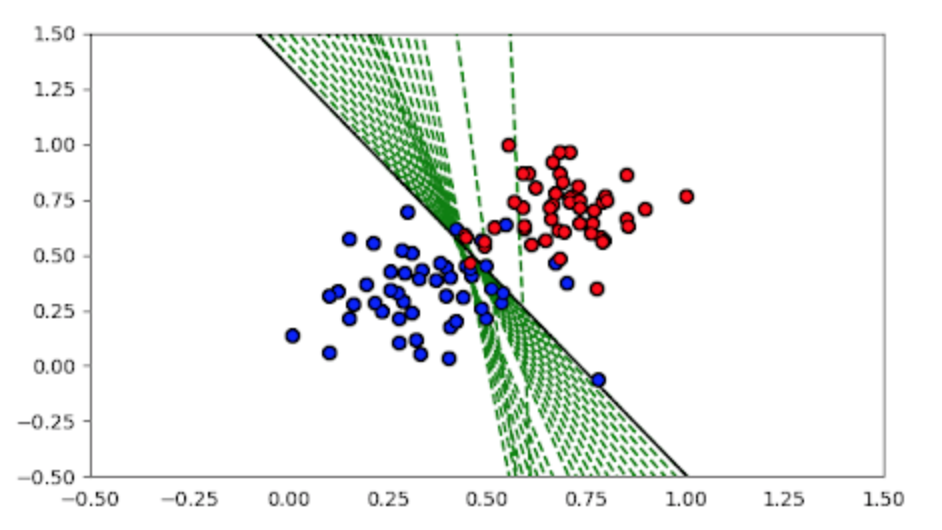

**Error Function:**: How far are we from our the solution.

**Gradient Descent**: Take small steps to reduce error function. Move from step function to sigmoid function.
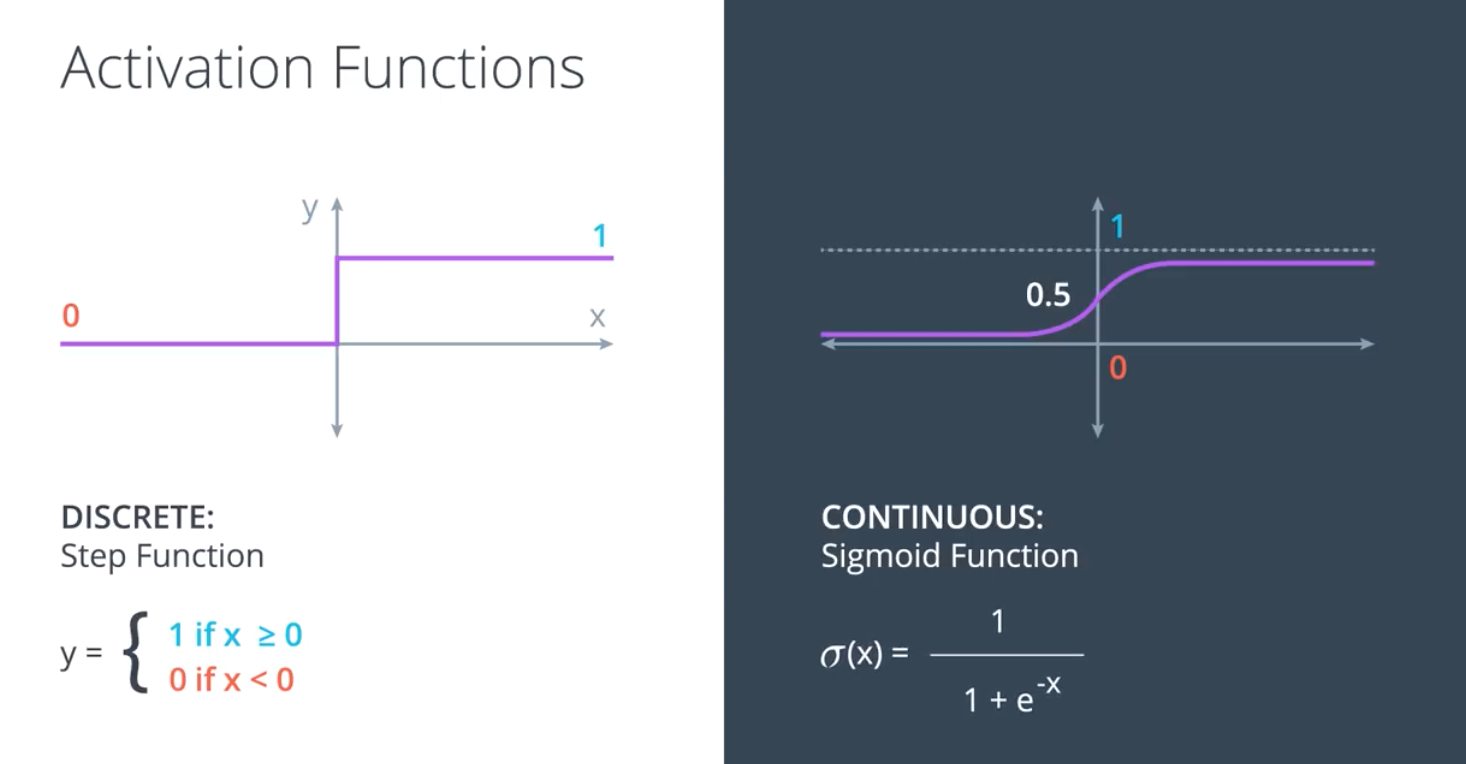

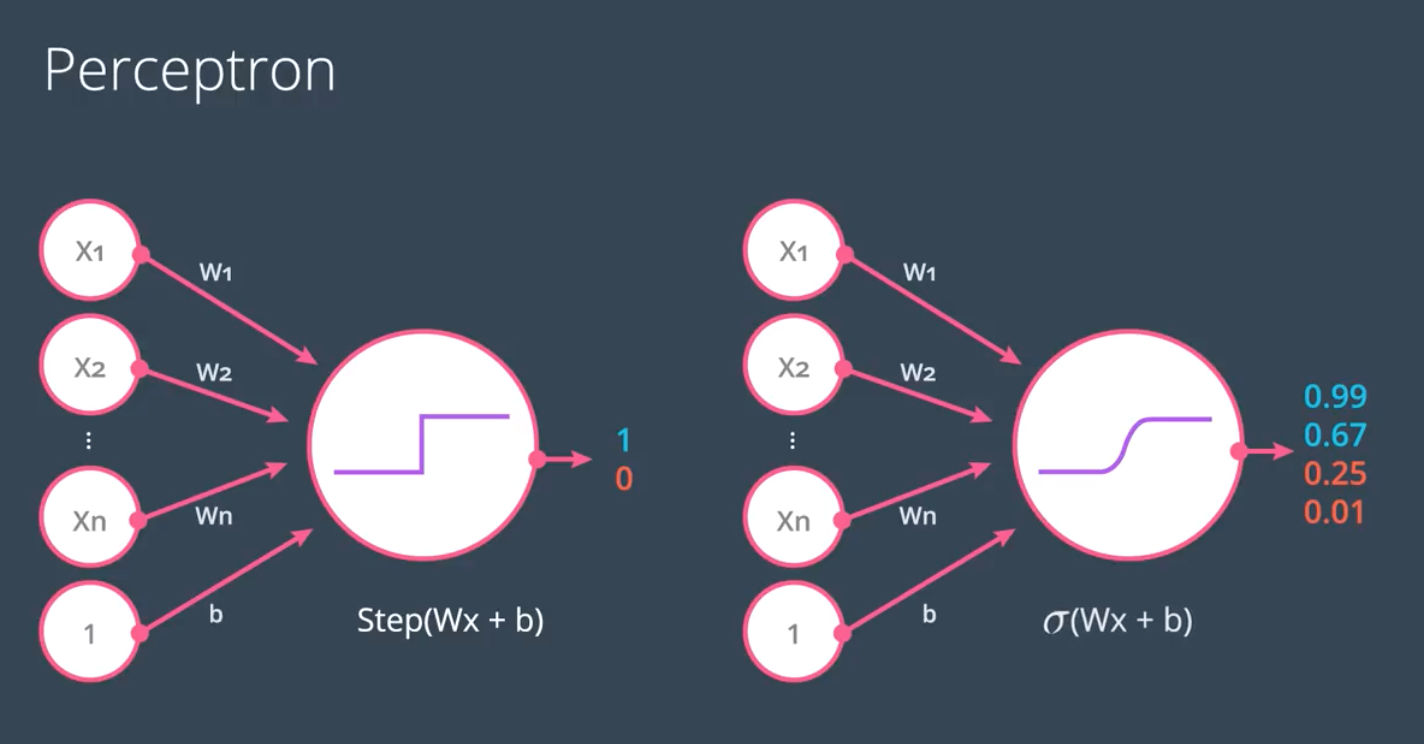

**Start to talk about probabilities than discrete yes or no.**

**Cross Entropy(Negative of log of probabilities):** A good model will give low cross entropy and a bad model will give high cross entropy. This is very common. Now we will focus on minimizing cross entropy instead of maximising probability.

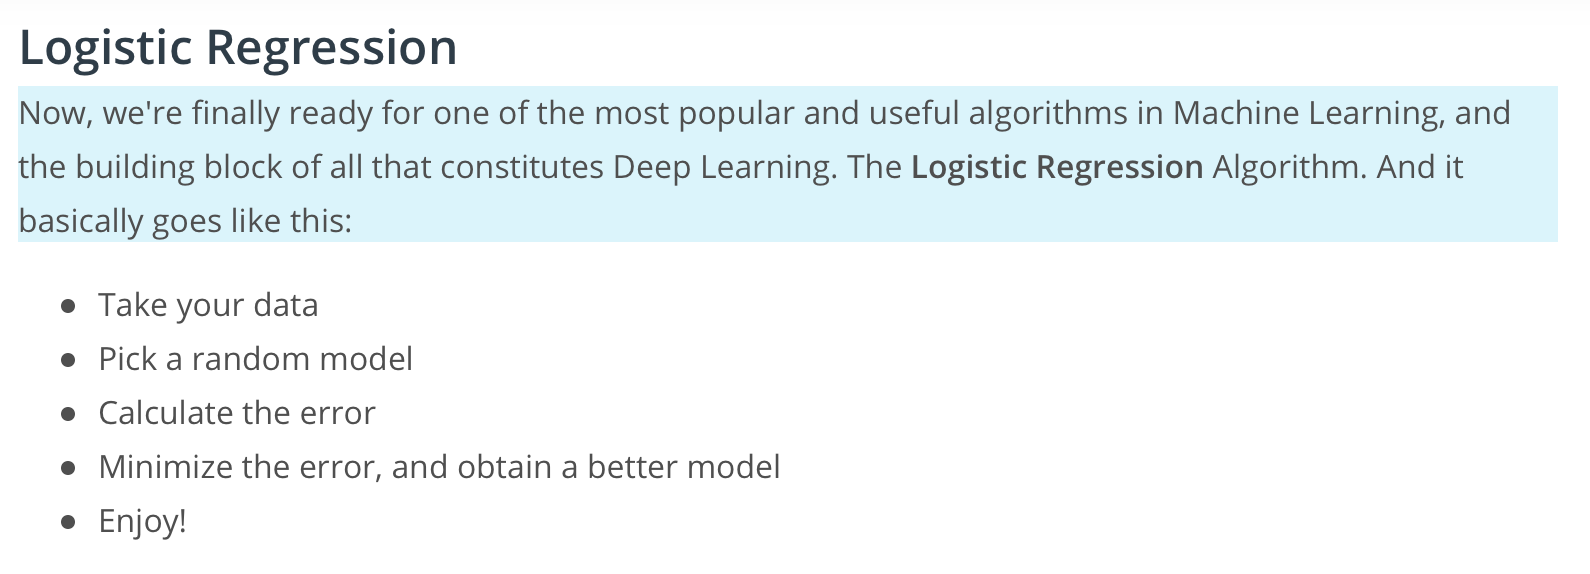

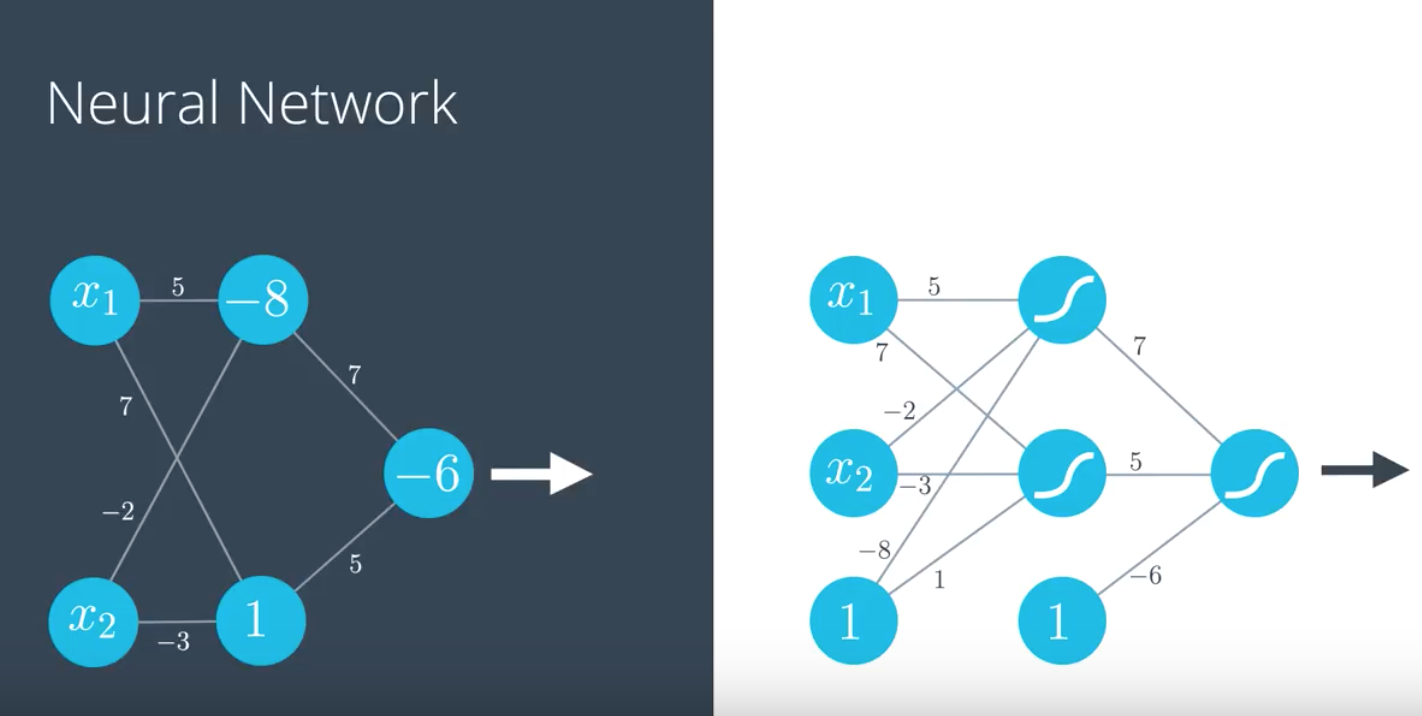

**Feedforward:** Feedforward is the process neural networks use to turn the input into an output

**Backpropagation:**
In training a neural network, we'll use the method known as backpropagation. In a nutshell, backpropagation will consist of:

1. Doing a feedforward operation.
2. Comparing the output of the model with the desired output.
3. Calculating the error.
4. Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights.
5. Use this to update the weights, and get a better model.
6. Continue this until we have a model that is good.